In [31]:
### Import libraries
import pandas as pd # primary data structure library
import numpy as np # useful for many scientific computing in Python
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches # needed for waffle Charts
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.express as px
import random
import math
import time
import datetime
import folium # to create maps
from pylab import *
%matplotlib inline
import warnings
mpl.style.use('seaborn-darkgrid') # optional: for ggplot-like style
warnings.filterwarnings("ignore")

# Dataset

In [32]:
###Import the data from CSSE at Johns Hopkins University (https://systems.jhu.edu/)
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [33]:
### Replace NaN values by 0
confirmed_df.fillna(0, inplace=True)
deaths_df.fillna(0, inplace=True)
recoveries_df.fillna(0, inplace=True)

In [34]:
# Remove columns
confirmed_df = confirmed_df.drop(['Province/State'], axis=1)
deaths_df = deaths_df.drop(['Province/State'], axis=1)
recoveries_df = recoveries_df.drop(['Province/State'], axis=1)

In [35]:
###Index columns as DataFrame series
cols = confirmed_df.keys()

In [36]:
###Get all the dates for the outbreak
confirmed = confirmed_df.loc[:, cols[3]:cols[-1]]
deaths = deaths_df.loc[:, cols[3]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[3]:cols[-1]]

In [37]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
active_cases = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)
    total_recovered.append(recovered_sum)
    active_cases.append(confirmed_sum-(recovered_sum+death_sum))
    active_cases_sum=(confirmed_sum-(recovered_sum+death_sum)).sum()

In [38]:
###Convert integer into datetime for better visualization
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')

In [39]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)
active_cases = np.array(active_cases).reshape(-1, 1)

In [40]:
###Future forecast
days_in_future = 3
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
adjusted_dates = future_forcast_dates[:-3]

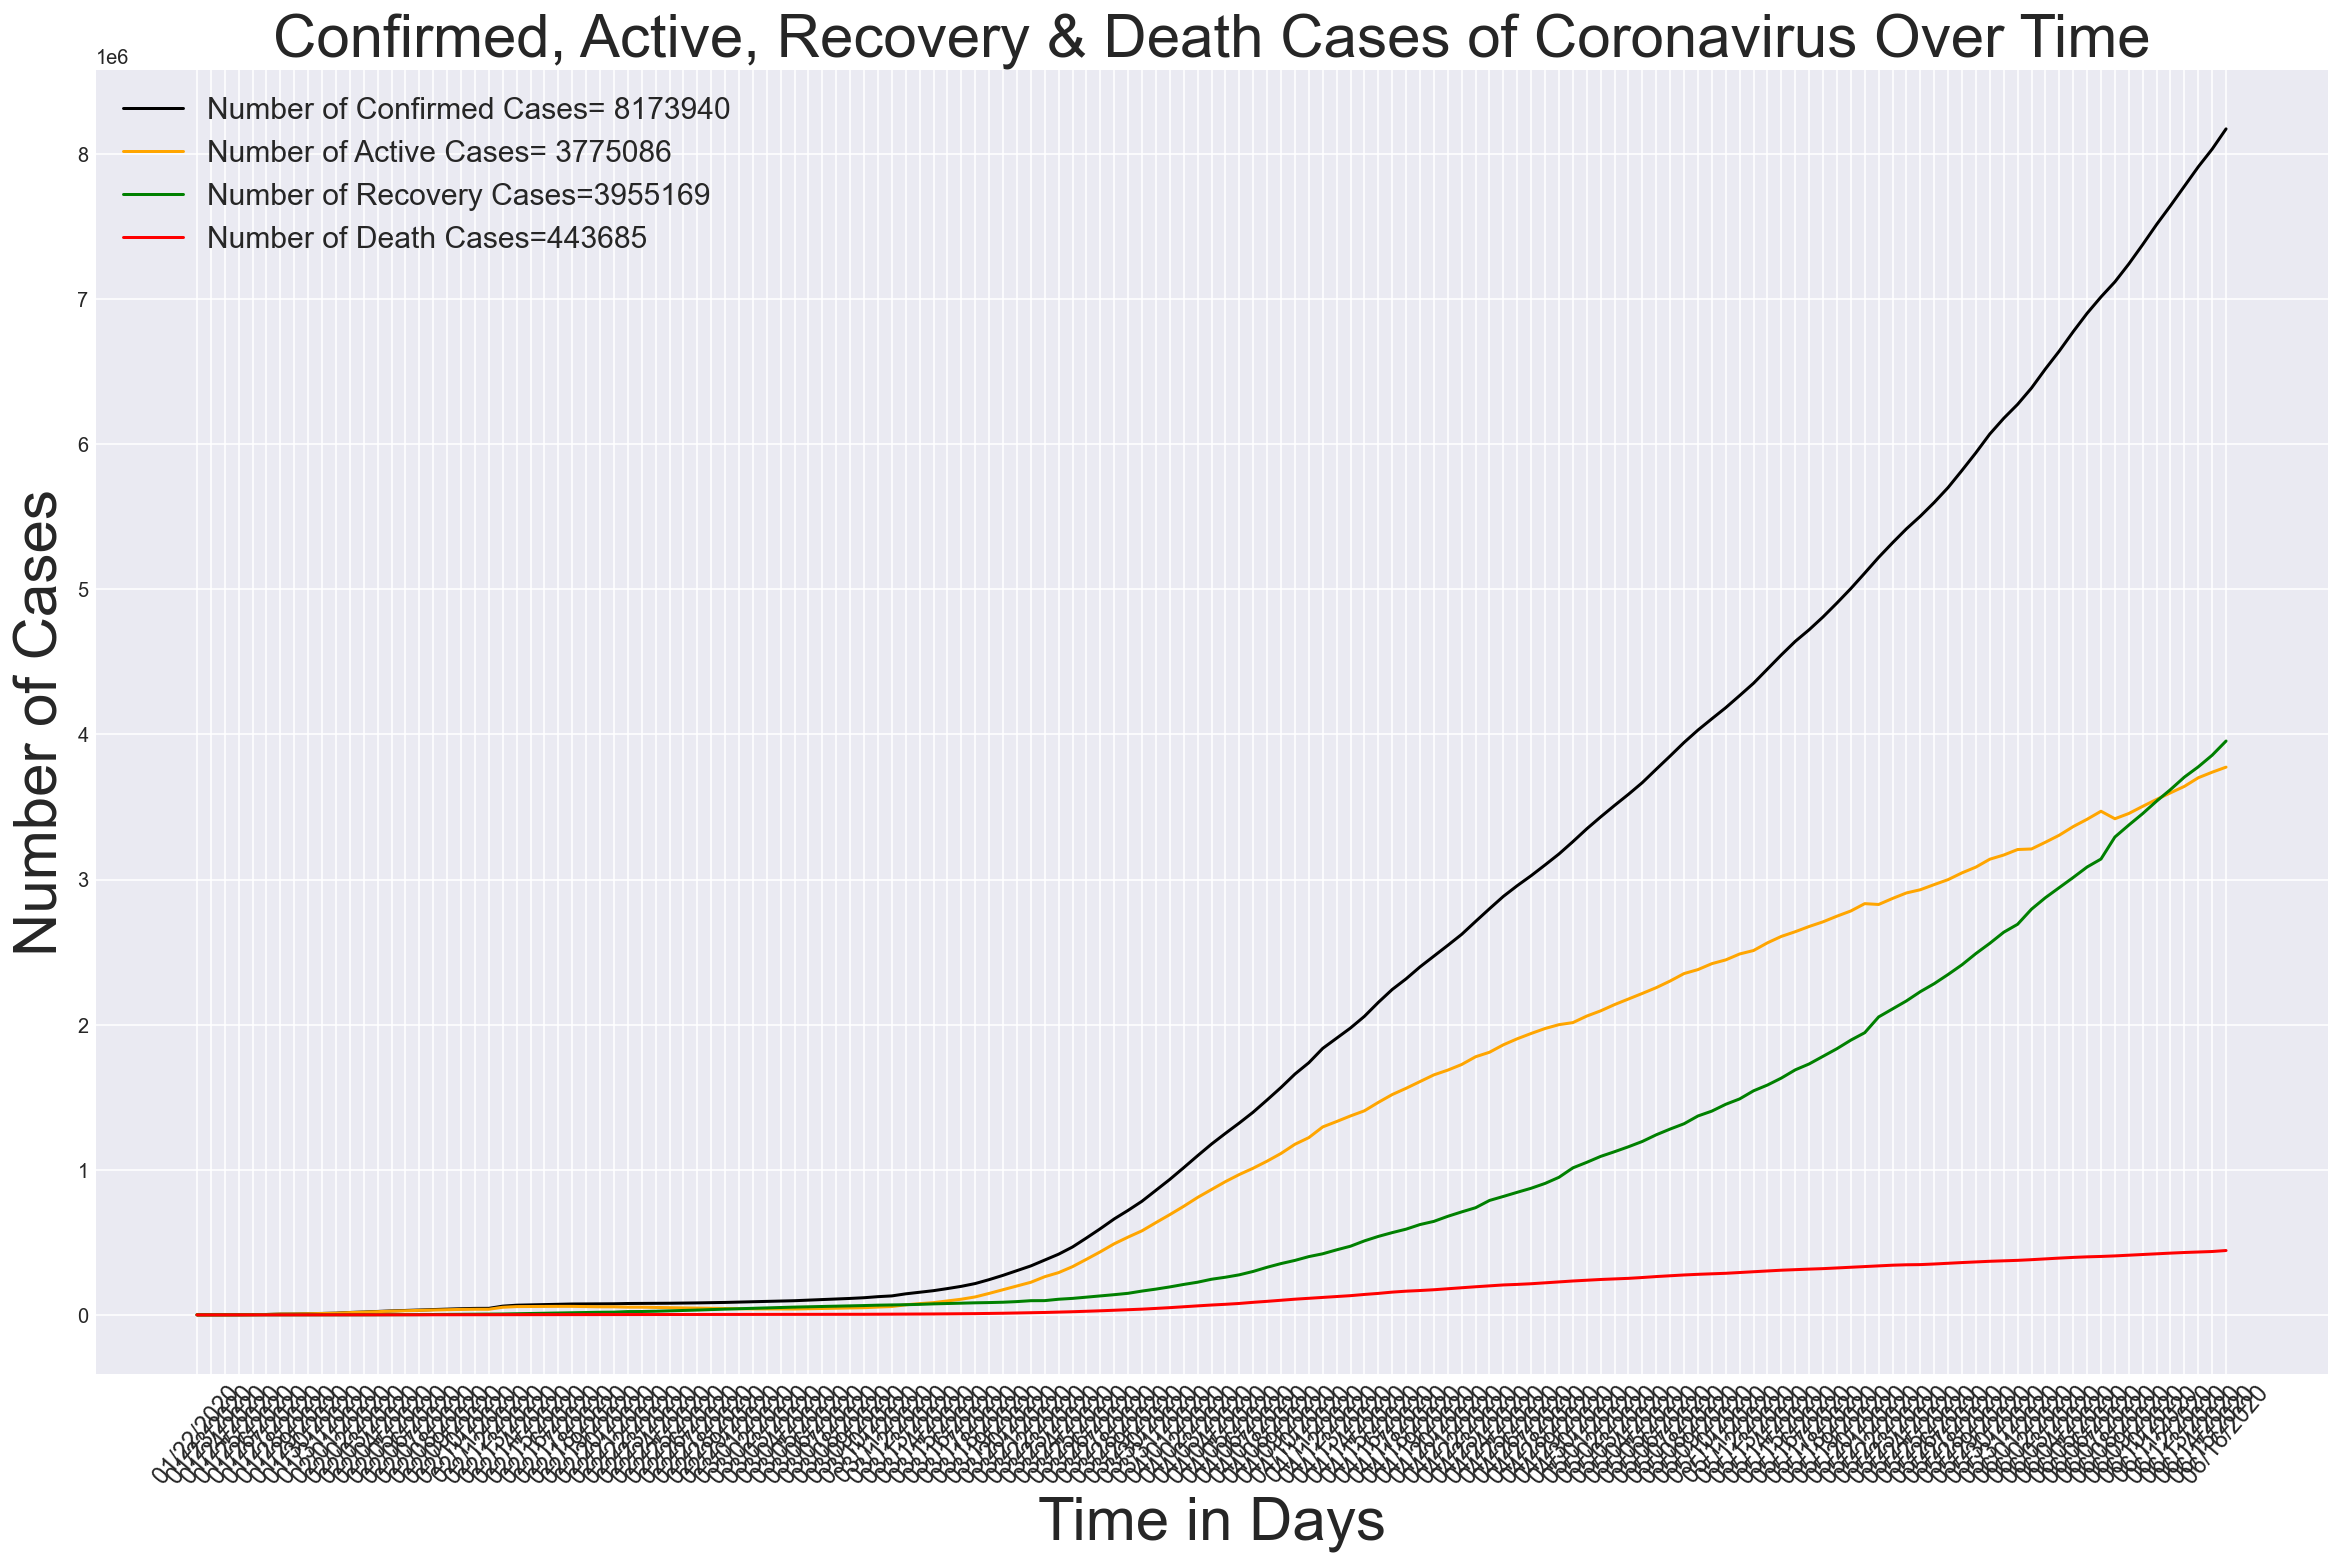

In [41]:
#Coronavirus Active/Confirmed/Recoveries/Deaths Cases Over Time
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases, color='black')
plt.plot(adjusted_dates, active_cases, color='orange')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.plot(adjusted_dates, total_deaths, color='red')
plt.title('Confirmed, Active, Recovery & Death Cases of Coronavirus Over Time', size=30)
plt.legend(['Number of Confirmed Cases= '+ str(confirmed_sum), 'Number of Active Cases= '+ str(active_cases_sum), 'Number of Recovery Cases='+ str(recovered_sum), 'Number of Death Cases='+ str(death_sum)], loc='upper left', fontsize=15)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(rotation=50, size=12)
plt.show()

This data is collected from repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE).https://github.com/CSSEGISandData/COVID-19

In [42]:
### Select yesterday date as report provide figures for the day before
from datetime import date, timedelta
file_date = str((date.today() - timedelta(days = 1)).strftime('%m-%d-%Y'))
### Select data path
github_dir_path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'
file_path = github_dir_path  + file_date + '.csv'
### Import data
df = pd.read_csv(file_path, error_bad_lines=False)

In [43]:
# Countries affected
countries = df['Country_Region'].unique().tolist()
print("\nTotal countries affected by virus: ",len(countries))
print(countries)


Total countries affected by virus:  188
['US', 'Italy', 'Brazil', 'Russia', 'Mexico', 'Japan', 'Canada', 'Colombia', 'Peru', 'Spain', 'India', 'United Kingdom', 'China', 'Chile', 'Netherlands', 'Australia', 'Pakistan', 'Germany', 'Sweden', 'Ukraine', 'Denmark', 'France', 'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'Gabo

In [44]:
### Replace NaN values by 0
df.fillna(0, inplace=True)
# Remove columns
df_countries = df.drop(['FIPS','Lat','Long_','Admin2','Province_State','Last_Update','Combined_Key'], axis=1)
# Rename the columns so that they make sense
df_countries.rename (columns = {'Country_Region':'Country'}, inplace = True)
# Re-order Columns
df_countries = df_countries[['Country','Confirmed','Active','Recovered','Deaths']]
# Group datas by Country
df_countries_grouped=df_countries.groupby('Country').sum()
# Set the country name as index
df_countries.set_index('Country', inplace=True)

In [45]:
# plotting configurations
%config InlineBackend.figure_format = 'retina'
plt.rc('figure', dpi=300)
plt.rc('savefig', dpi=300)
fig_size = (12,6)
big_fig_size = (18,8)

In [46]:
fig = px.treemap(df.sort_values(by='Active', ascending=False).reset_index(drop=True), 
                 path=["Country_Region"], values="Active", 
                 title='Number of Active Cases',
                 color_discrete_sequence = px.colors.qualitative.Prism)
fig.show()

In [47]:
world_cases = []
total_active = []
total_recovered = [] 
total_deaths = [] 
recovery_rate = [] 
mortality_rate = []

confirmed_sum = df.Confirmed.sum()
active_sum=df.Active.sum()
recovered_sum = df.Recovered.sum()
death_sum = df.Deaths.sum()
world_cases.append(confirmed_sum)
total_active.append(active_sum)
total_recovered.append(recovered_sum)
total_deaths.append(death_sum)
recovery_rate.append(recovered_sum/confirmed_sum)
mortality_rate.append(death_sum/confirmed_sum)
mean_mortality_rate = np.mean(mortality_rate)
mean_recovery_rate = np.mean(recovery_rate)

In [48]:
print ('Total Confirmed Cases= '+ str(confirmed_sum))
print ('Total Active Cases= '+ str(active_sum))
print ('Total Recovered Cases= '+ str(recovered_sum))
print ('Total Deaths Cases= '+ str(death_sum))
print ('Total Recovery Rate(%)= '+ str(mean_recovery_rate*100))
print ('Total Fatality Rate(%)= '+ str(mean_mortality_rate*100))

Total Confirmed Cases= 8173940
Total Active Cases= 3703050
Total Recovered Cases= 3955169
Total Deaths Cases= 443685
Total Recovery Rate(%)= 48.387546275113344
Total Fatality Rate(%)= 5.428043269219006


In [49]:
### Show Countries with no Recovered cases
df_countries_grouped = df_countries_grouped.sort_values('Recovered', ascending=False)
df_countries_grouped.tail(10).style.background_gradient(cmap='Blues')

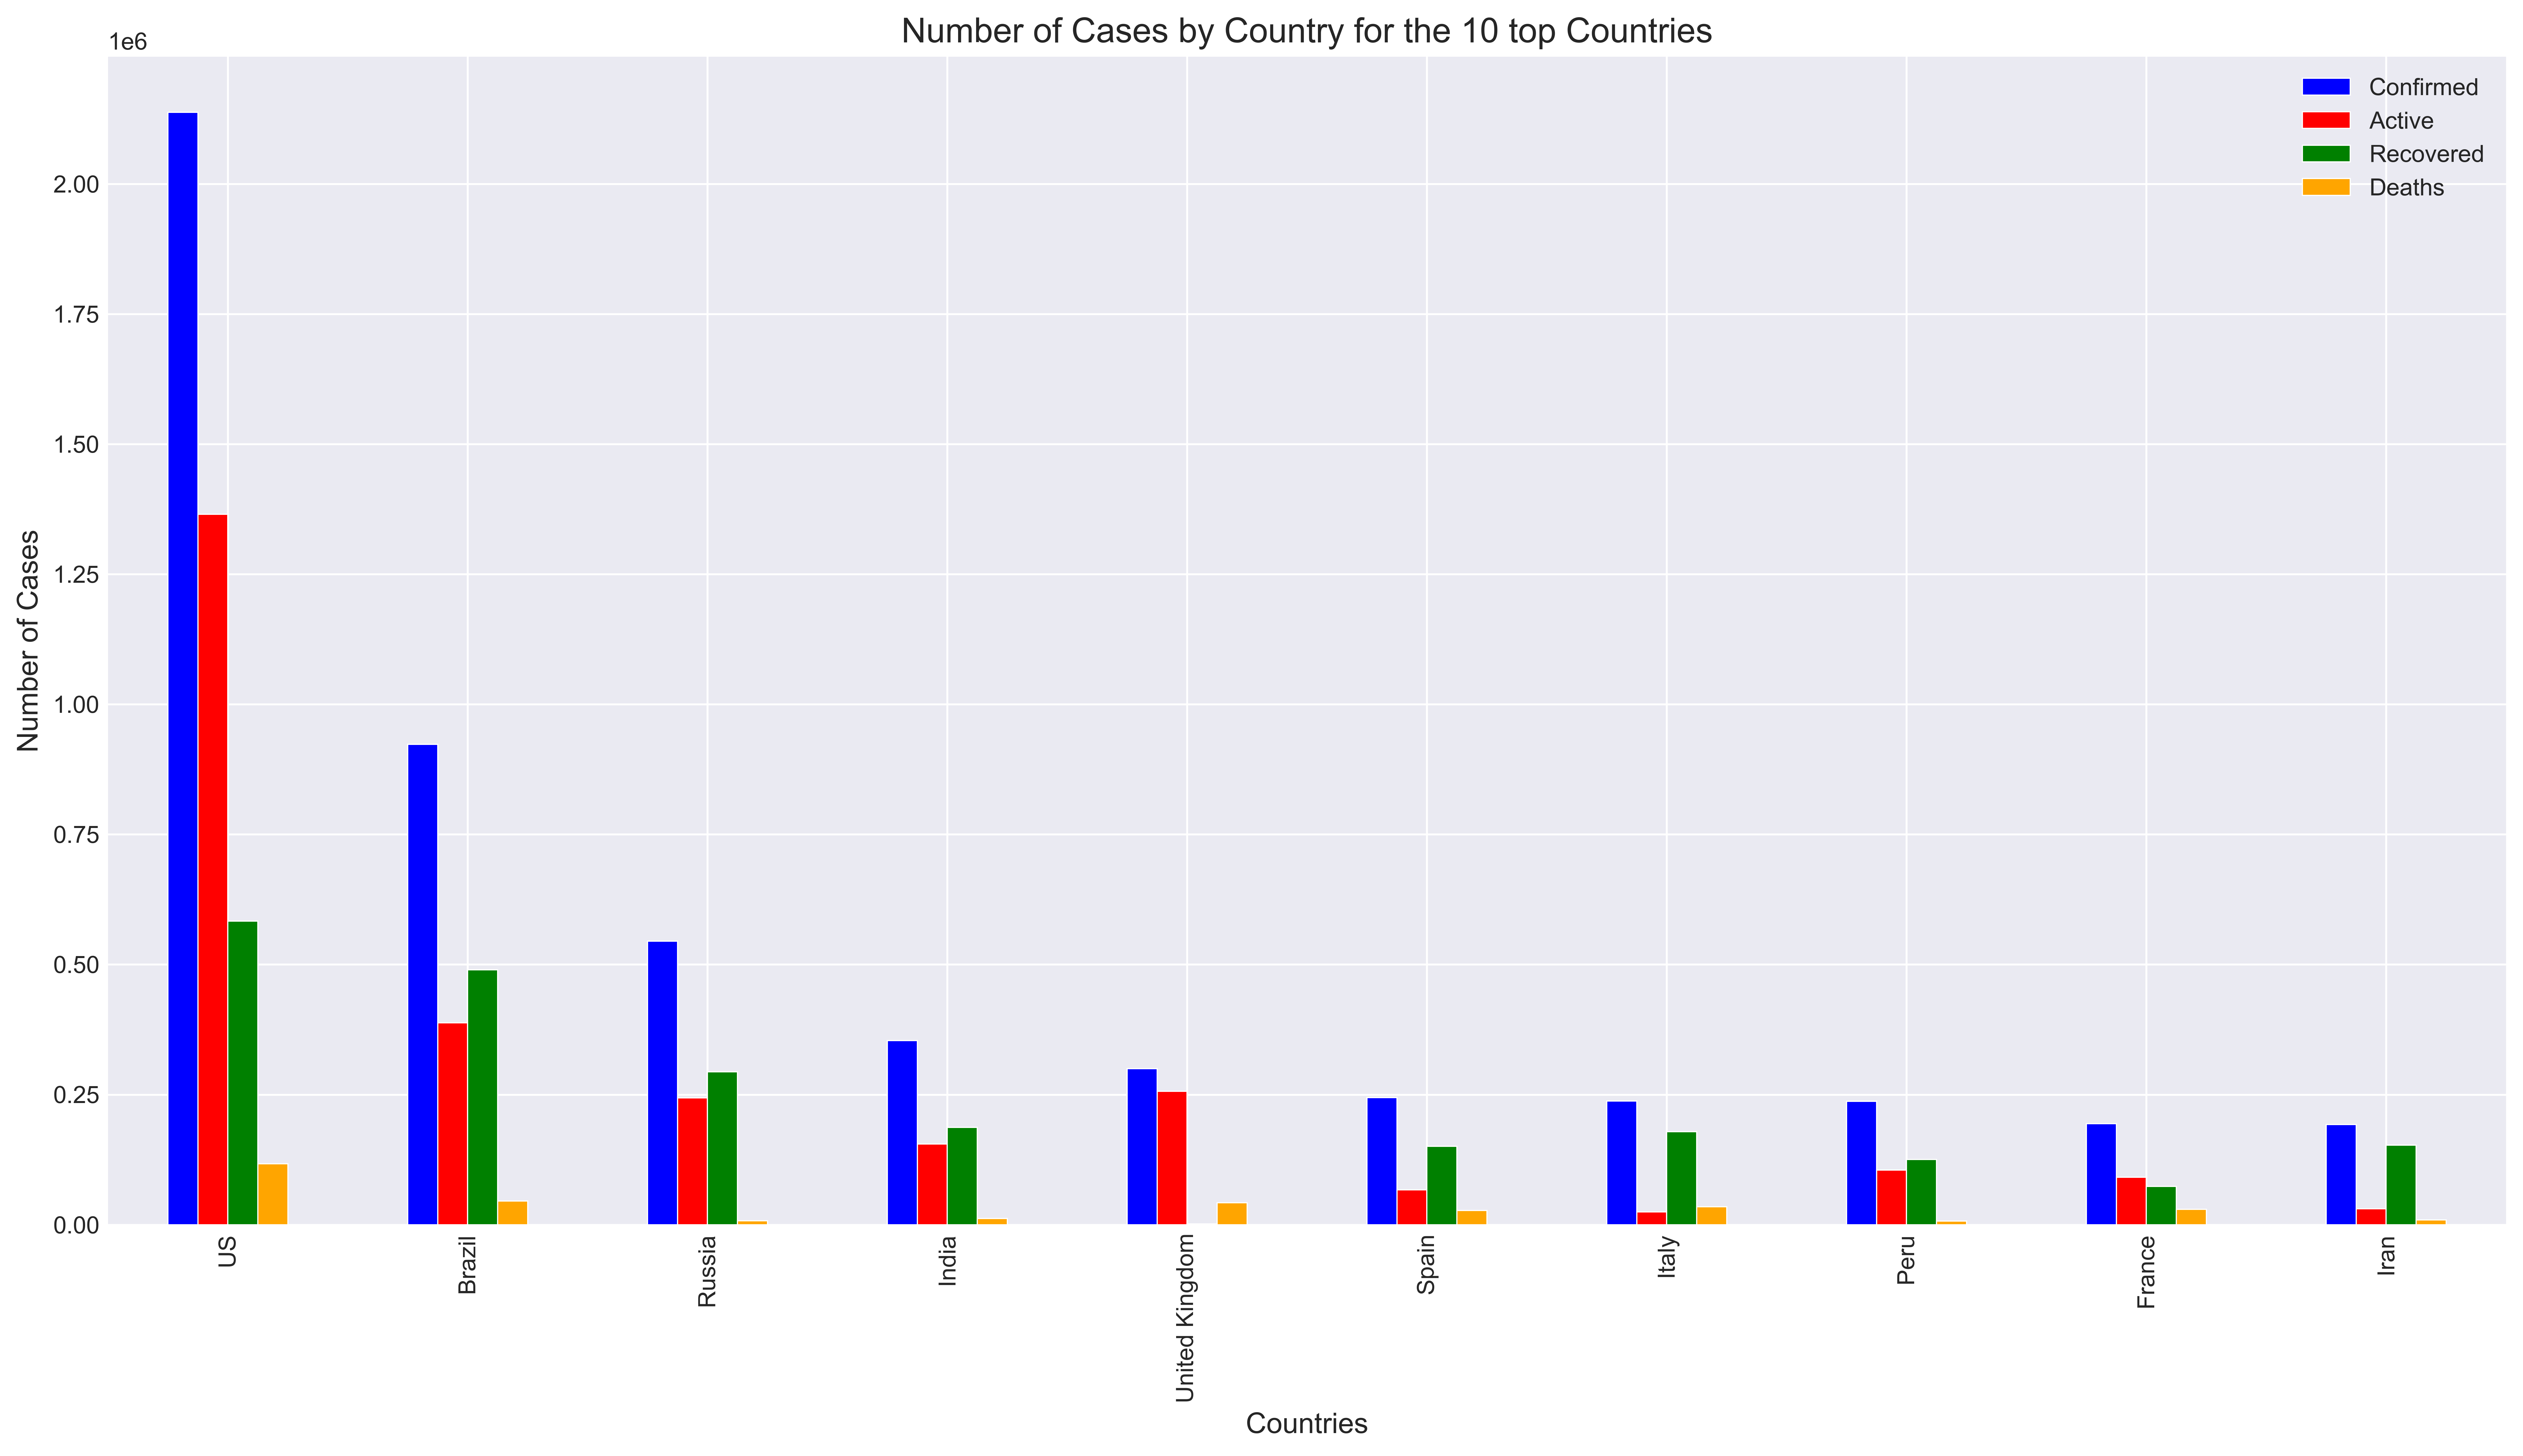

In [50]:
### Sort the top countries by Confirmed cases
df_countries_grouped.sort_values(['Confirmed'], ascending=False, axis=0, inplace=True)
# get the top entries
df_countries_top = df_countries_grouped.head(10)
### Show Unstacked Histogram
df_countries_top.plot(kind='bar', figsize=(18, 9), stacked=False, 
            color=['blue', 'red', 'green', 'orange'])
plt.title('Number of Cases by Country for the 10 top Countries')
plt.ylabel('Number of Cases')
plt.xlabel('Countries')
plt.show()

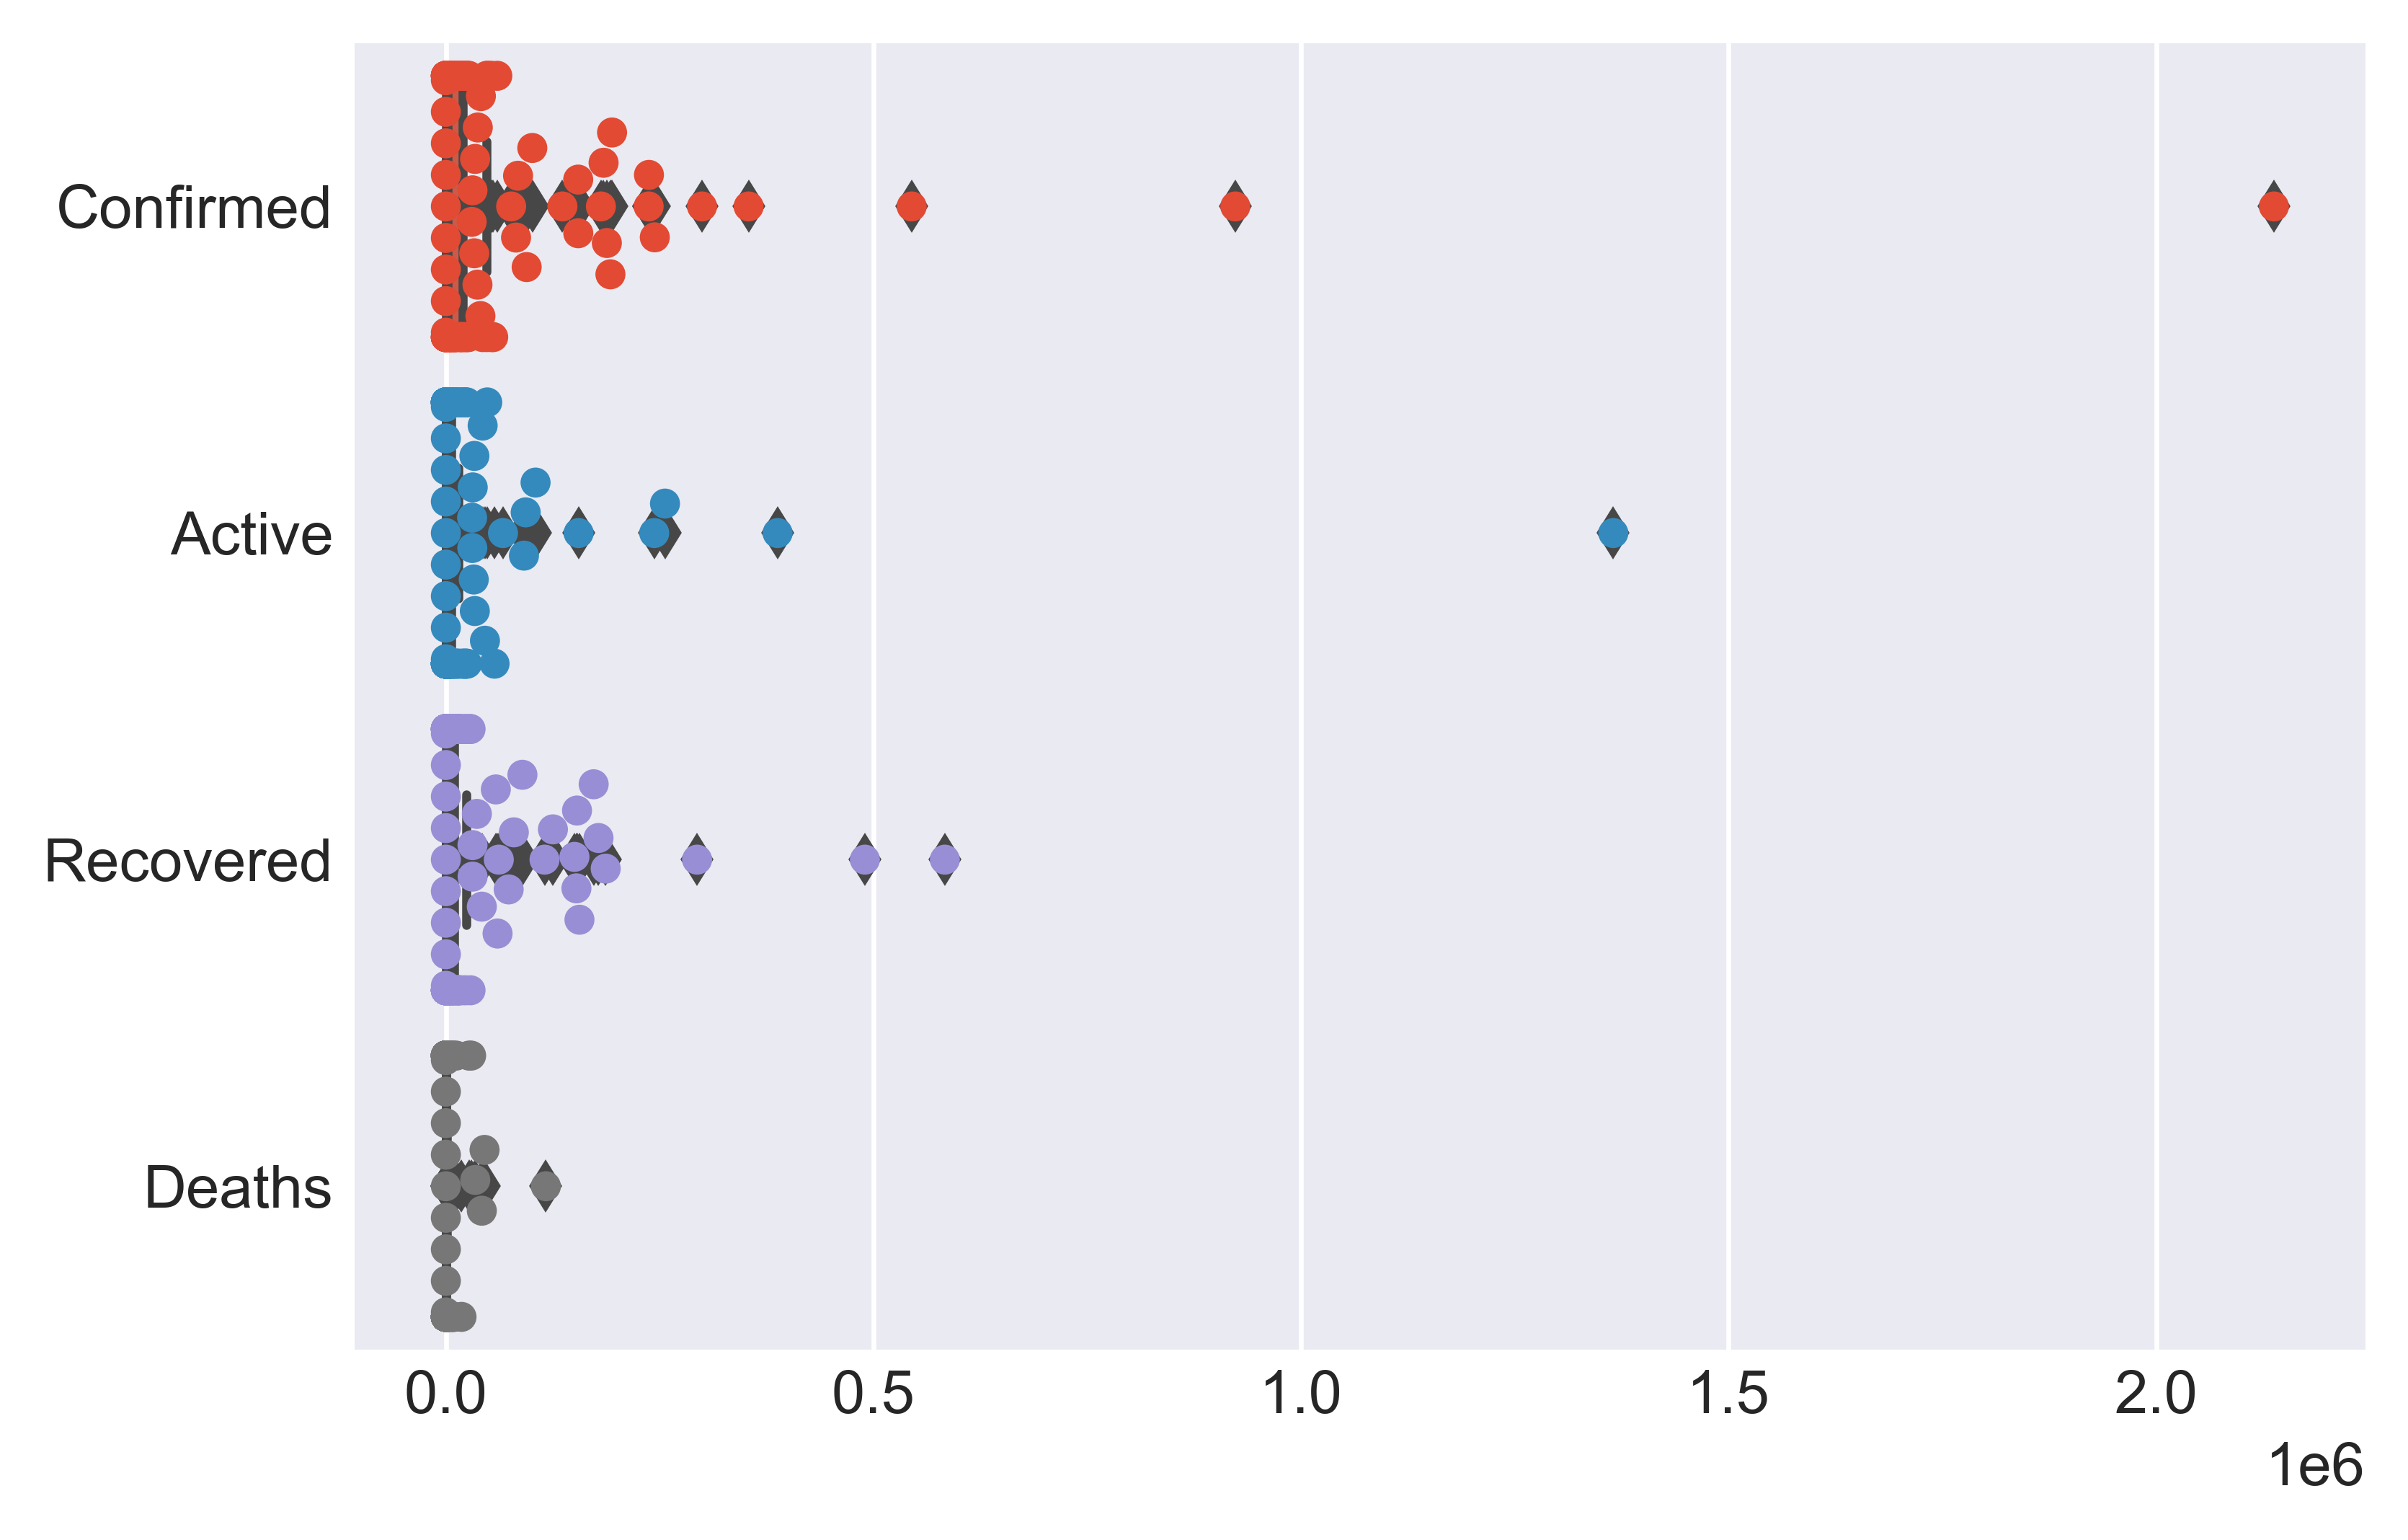

In [51]:
ax = sns.boxplot(data=df_countries_grouped, orient="h")
ax = sns.swarmplot(data=df_countries_grouped, orient="h")

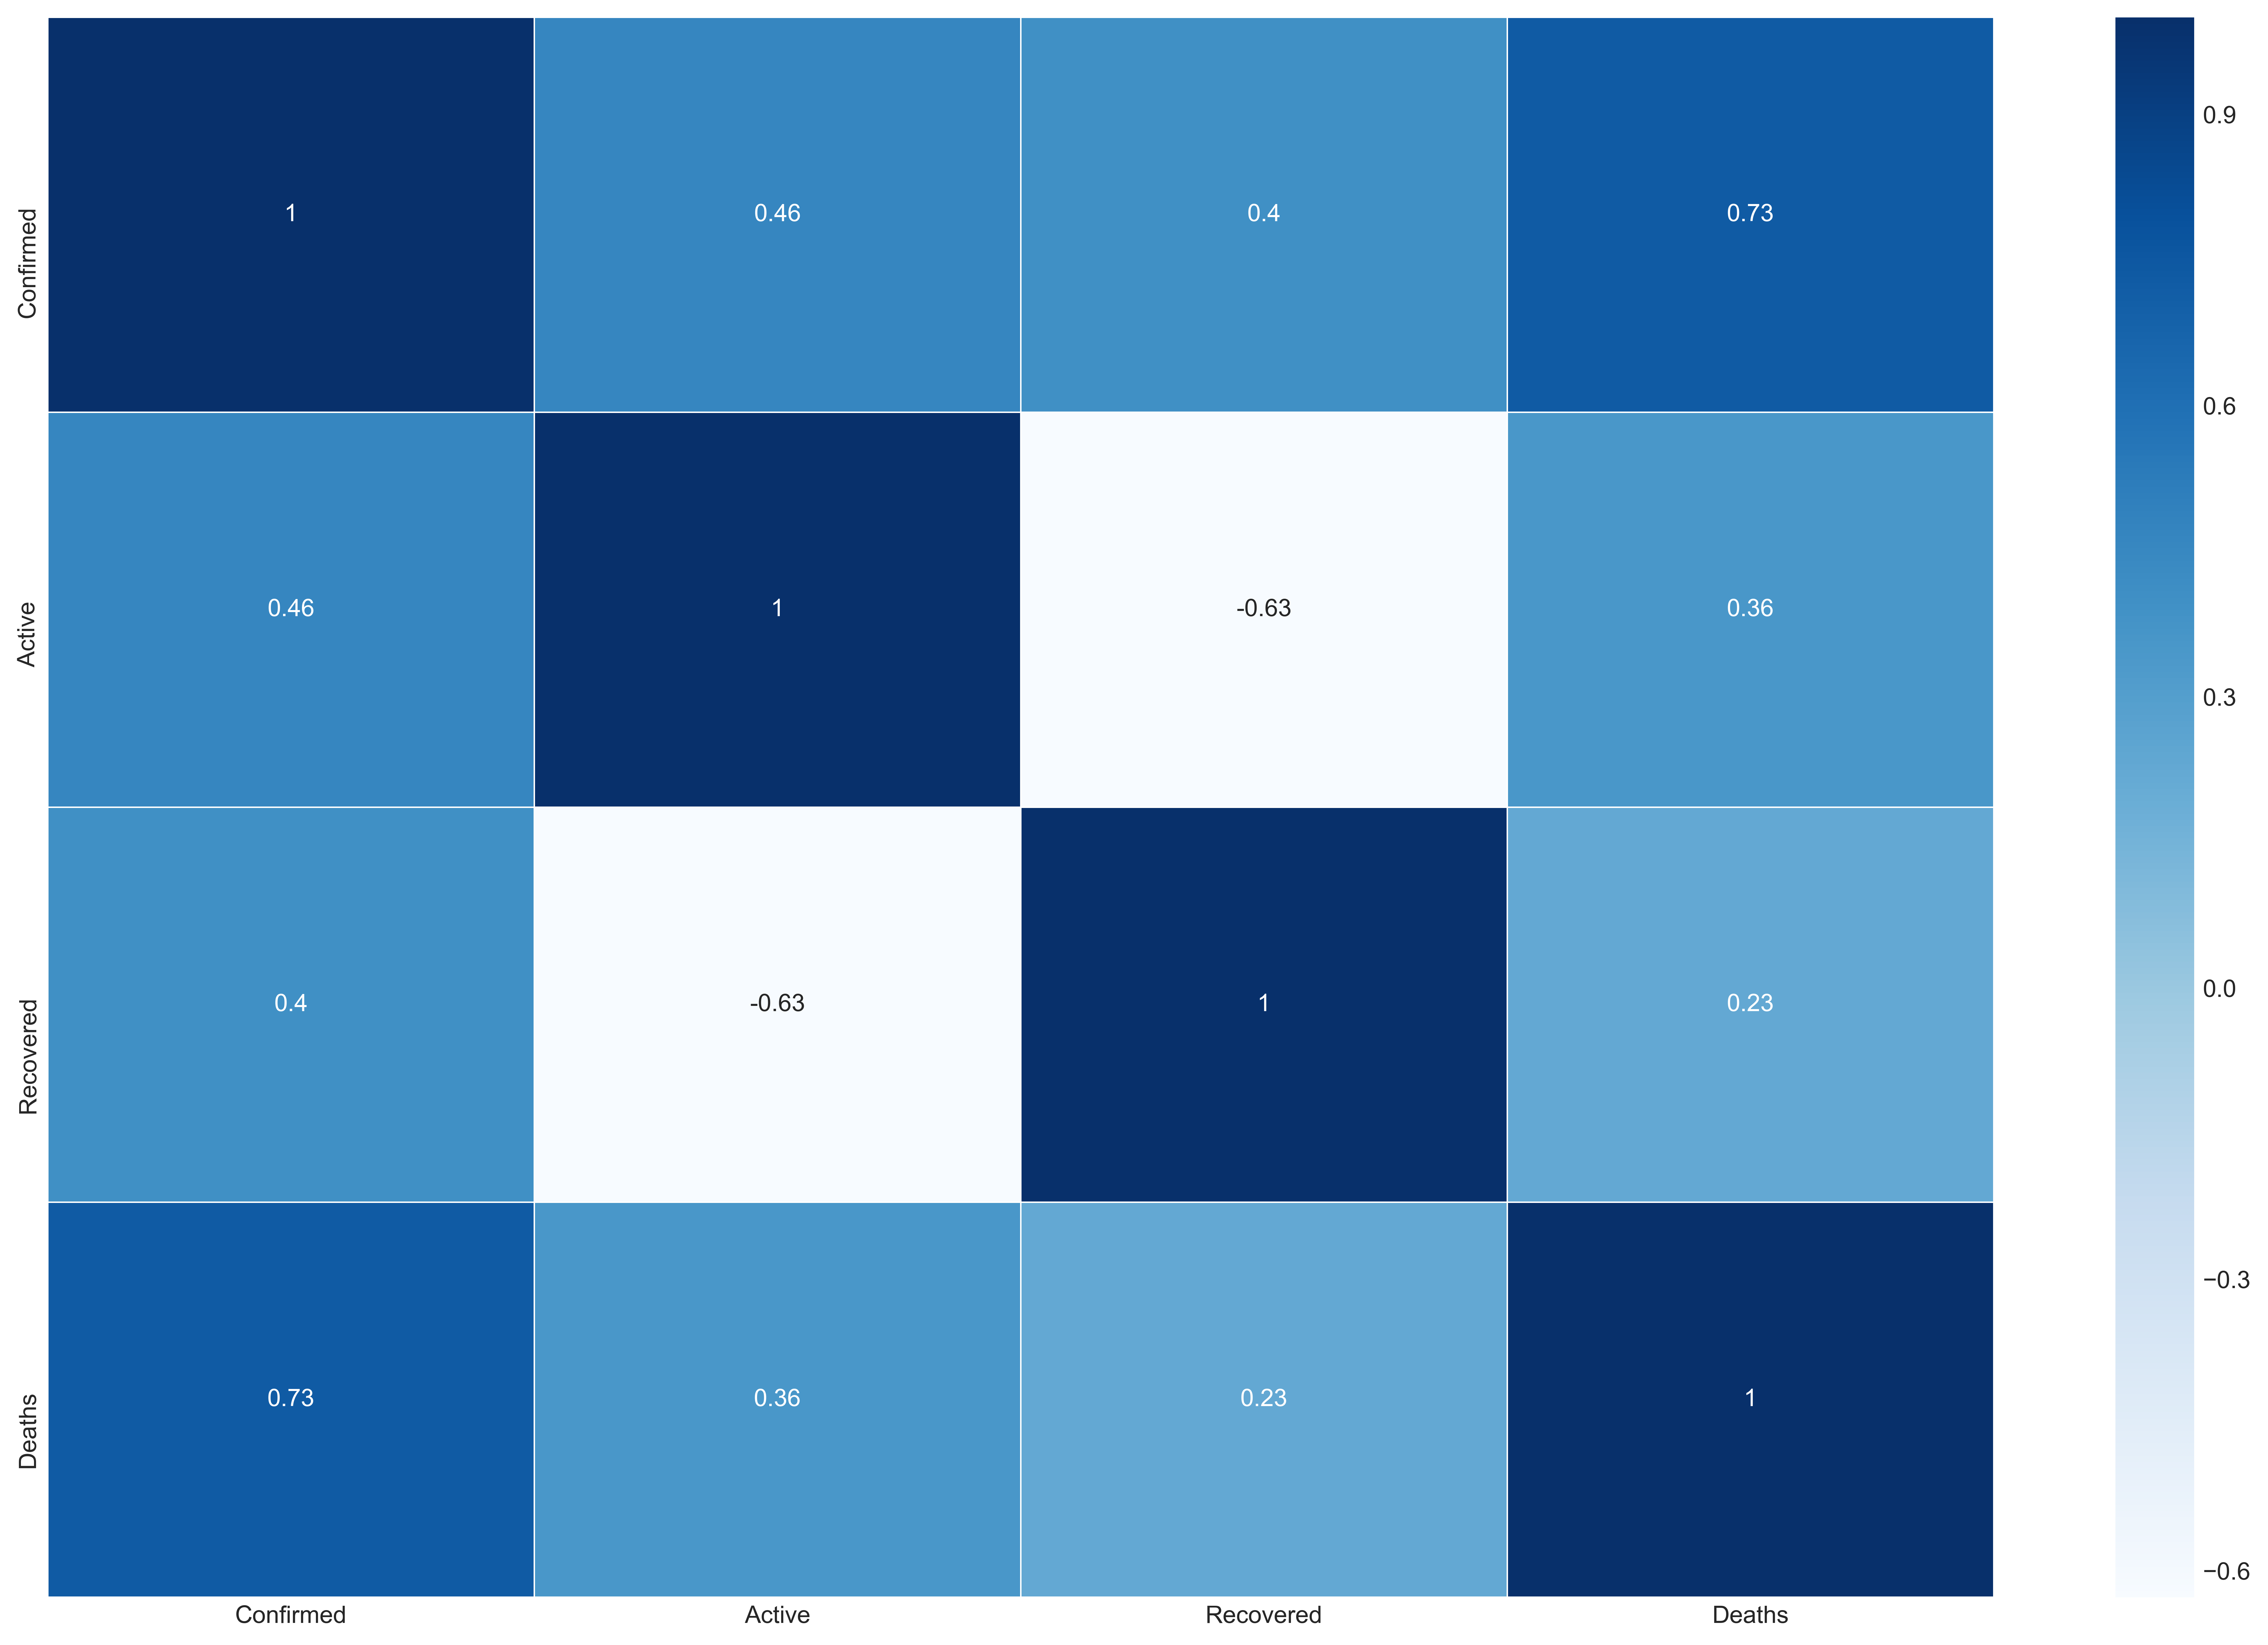

In [52]:
### Show heatmap Correlation 
ax = plt.subplots(figsize=(18, 12))
sns.heatmap(df_countries.corr(), annot=True, linewidths=.5, cmap="Blues")

In [53]:
sns.pairplot(df_countries_grouped[['Confirmed','Deaths','Recovered','Active']], diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, palette="husl",
             size = 4);

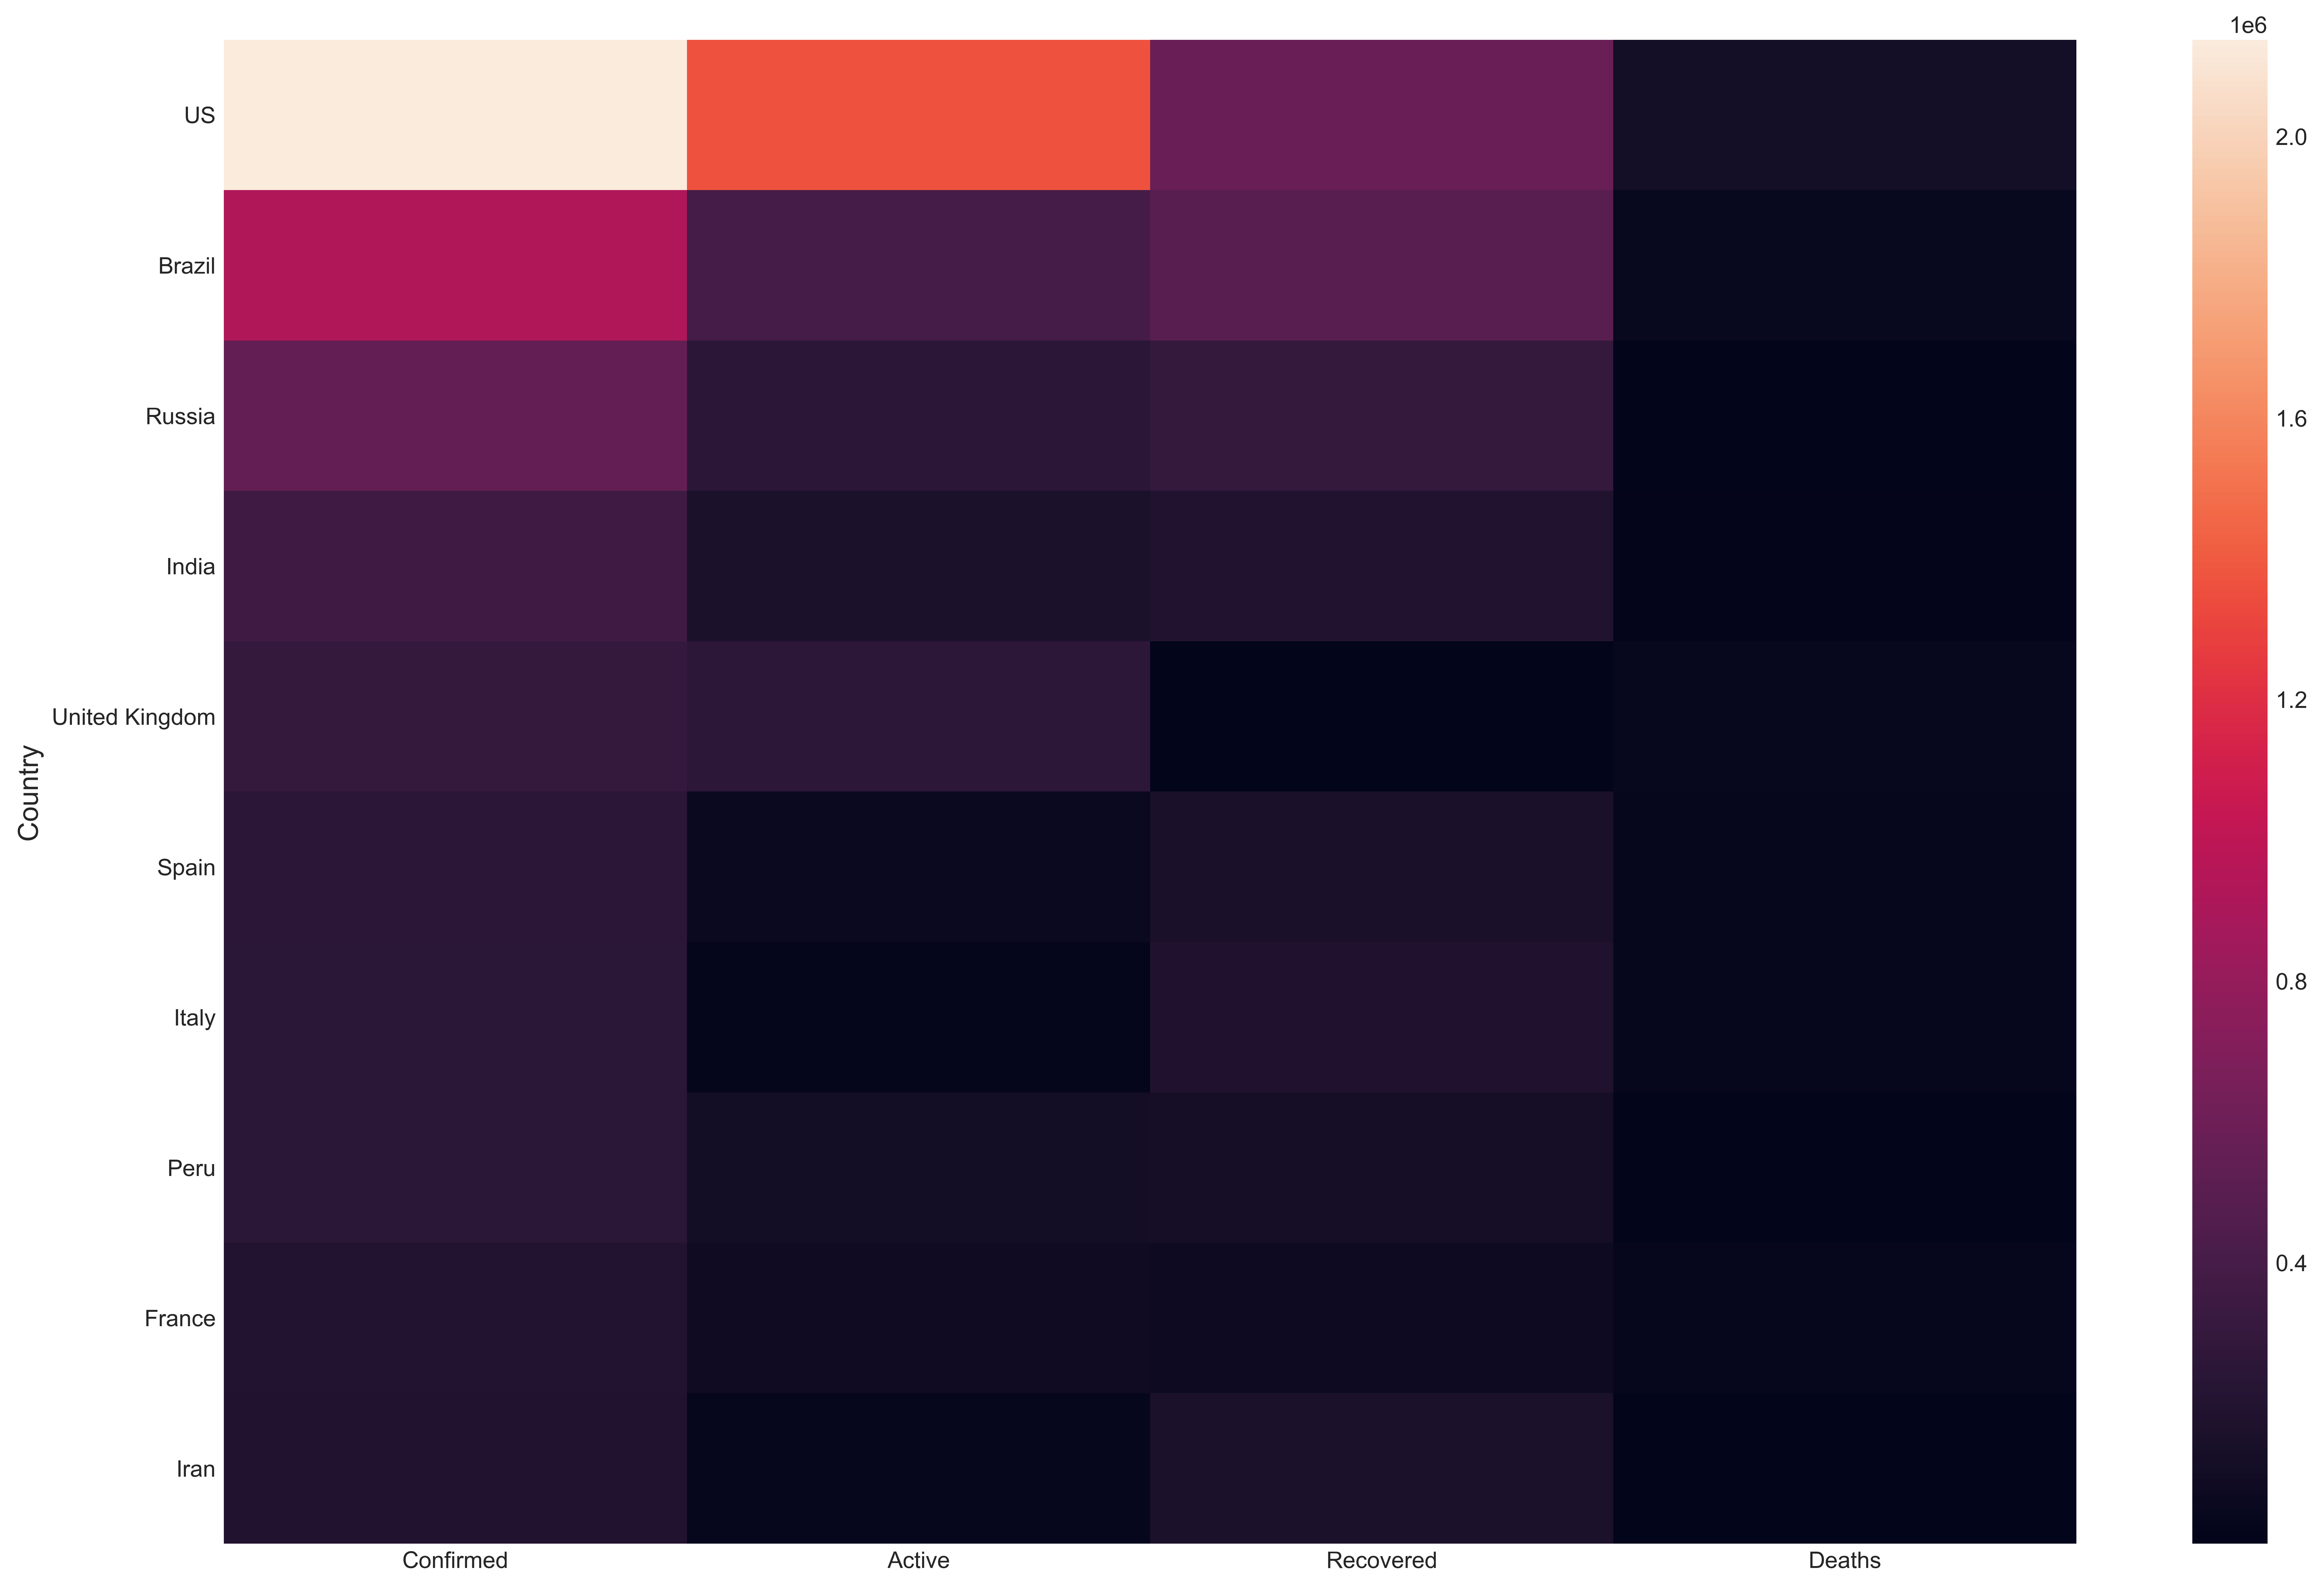

In [54]:
### Show heatmap
sns.set_style("darkgrid")
ax = plt.subplots(figsize=(18, 12))
sns.heatmap(df_countries_top)

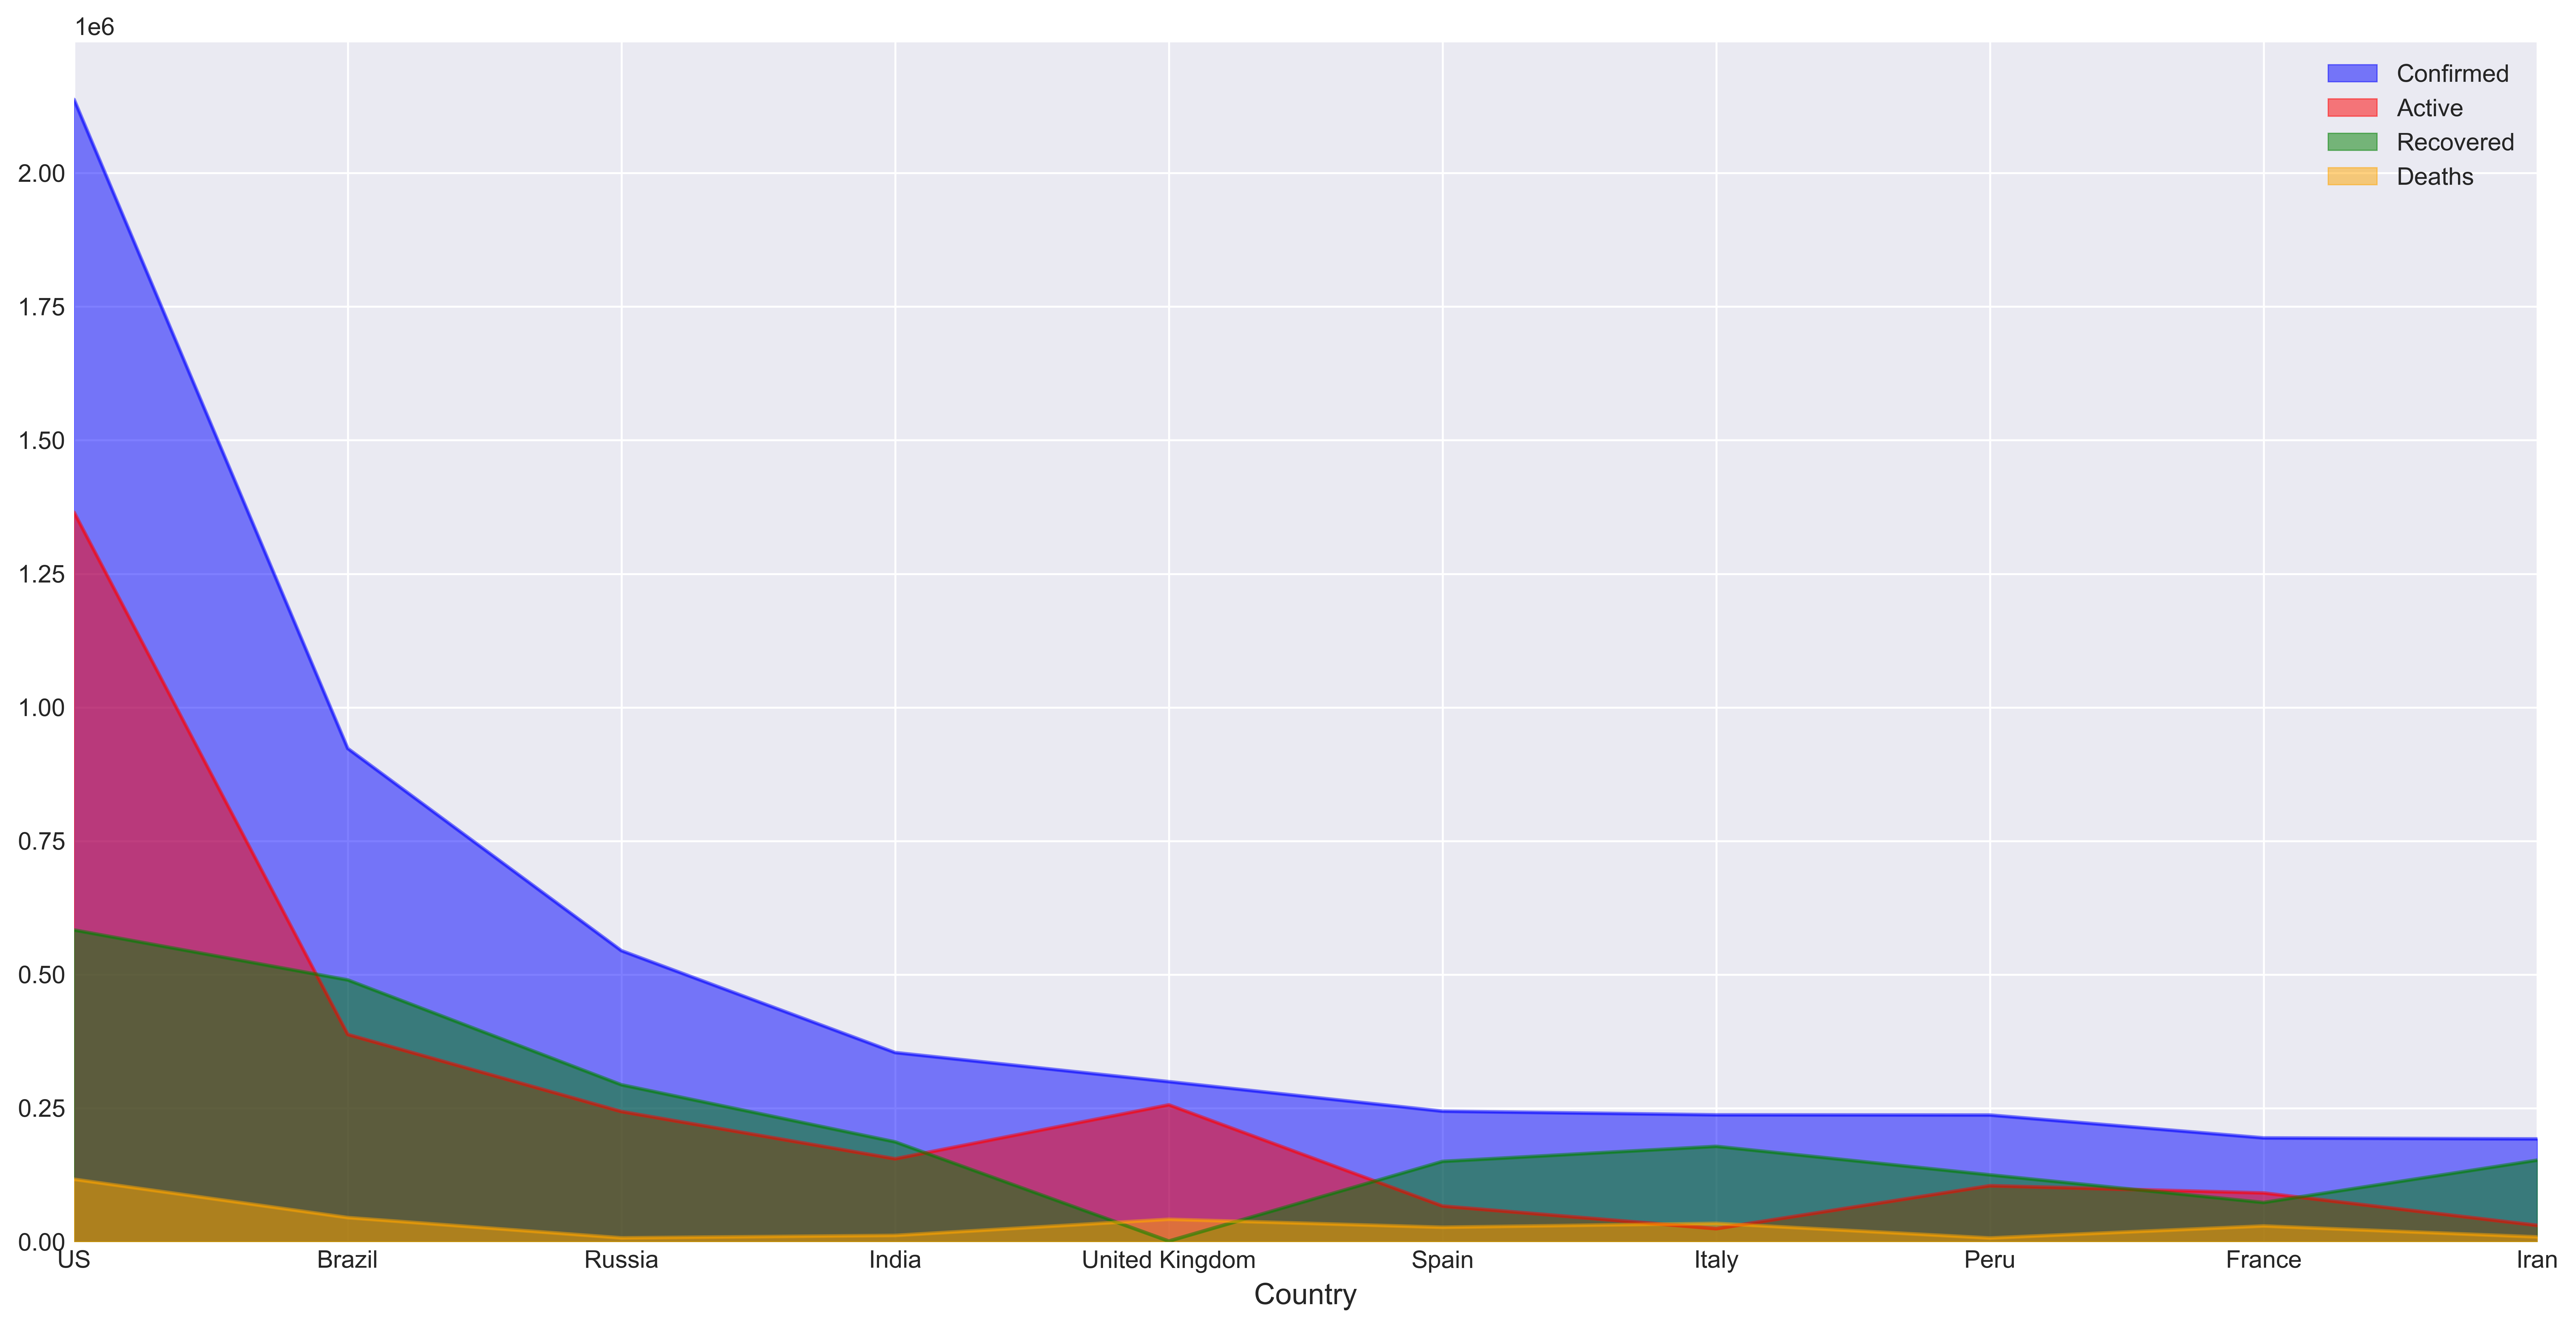

In [55]:
# Line plot top 8 countries
df_countries_top.plot(kind='area', figsize=(18, 9),stacked=False, 
            color=['blue', 'red', 'green', 'orange']) 
plt.show()

In [56]:
df_countries_top = df_countries_top.reset_index()

In [57]:
sns.pairplot(df_countries_top, 
             vars = ['Confirmed', 'Active', 'Recovered', 'Deaths'], 
             hue = 'Country', diag_kind = 'kde', palette="husl",
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);

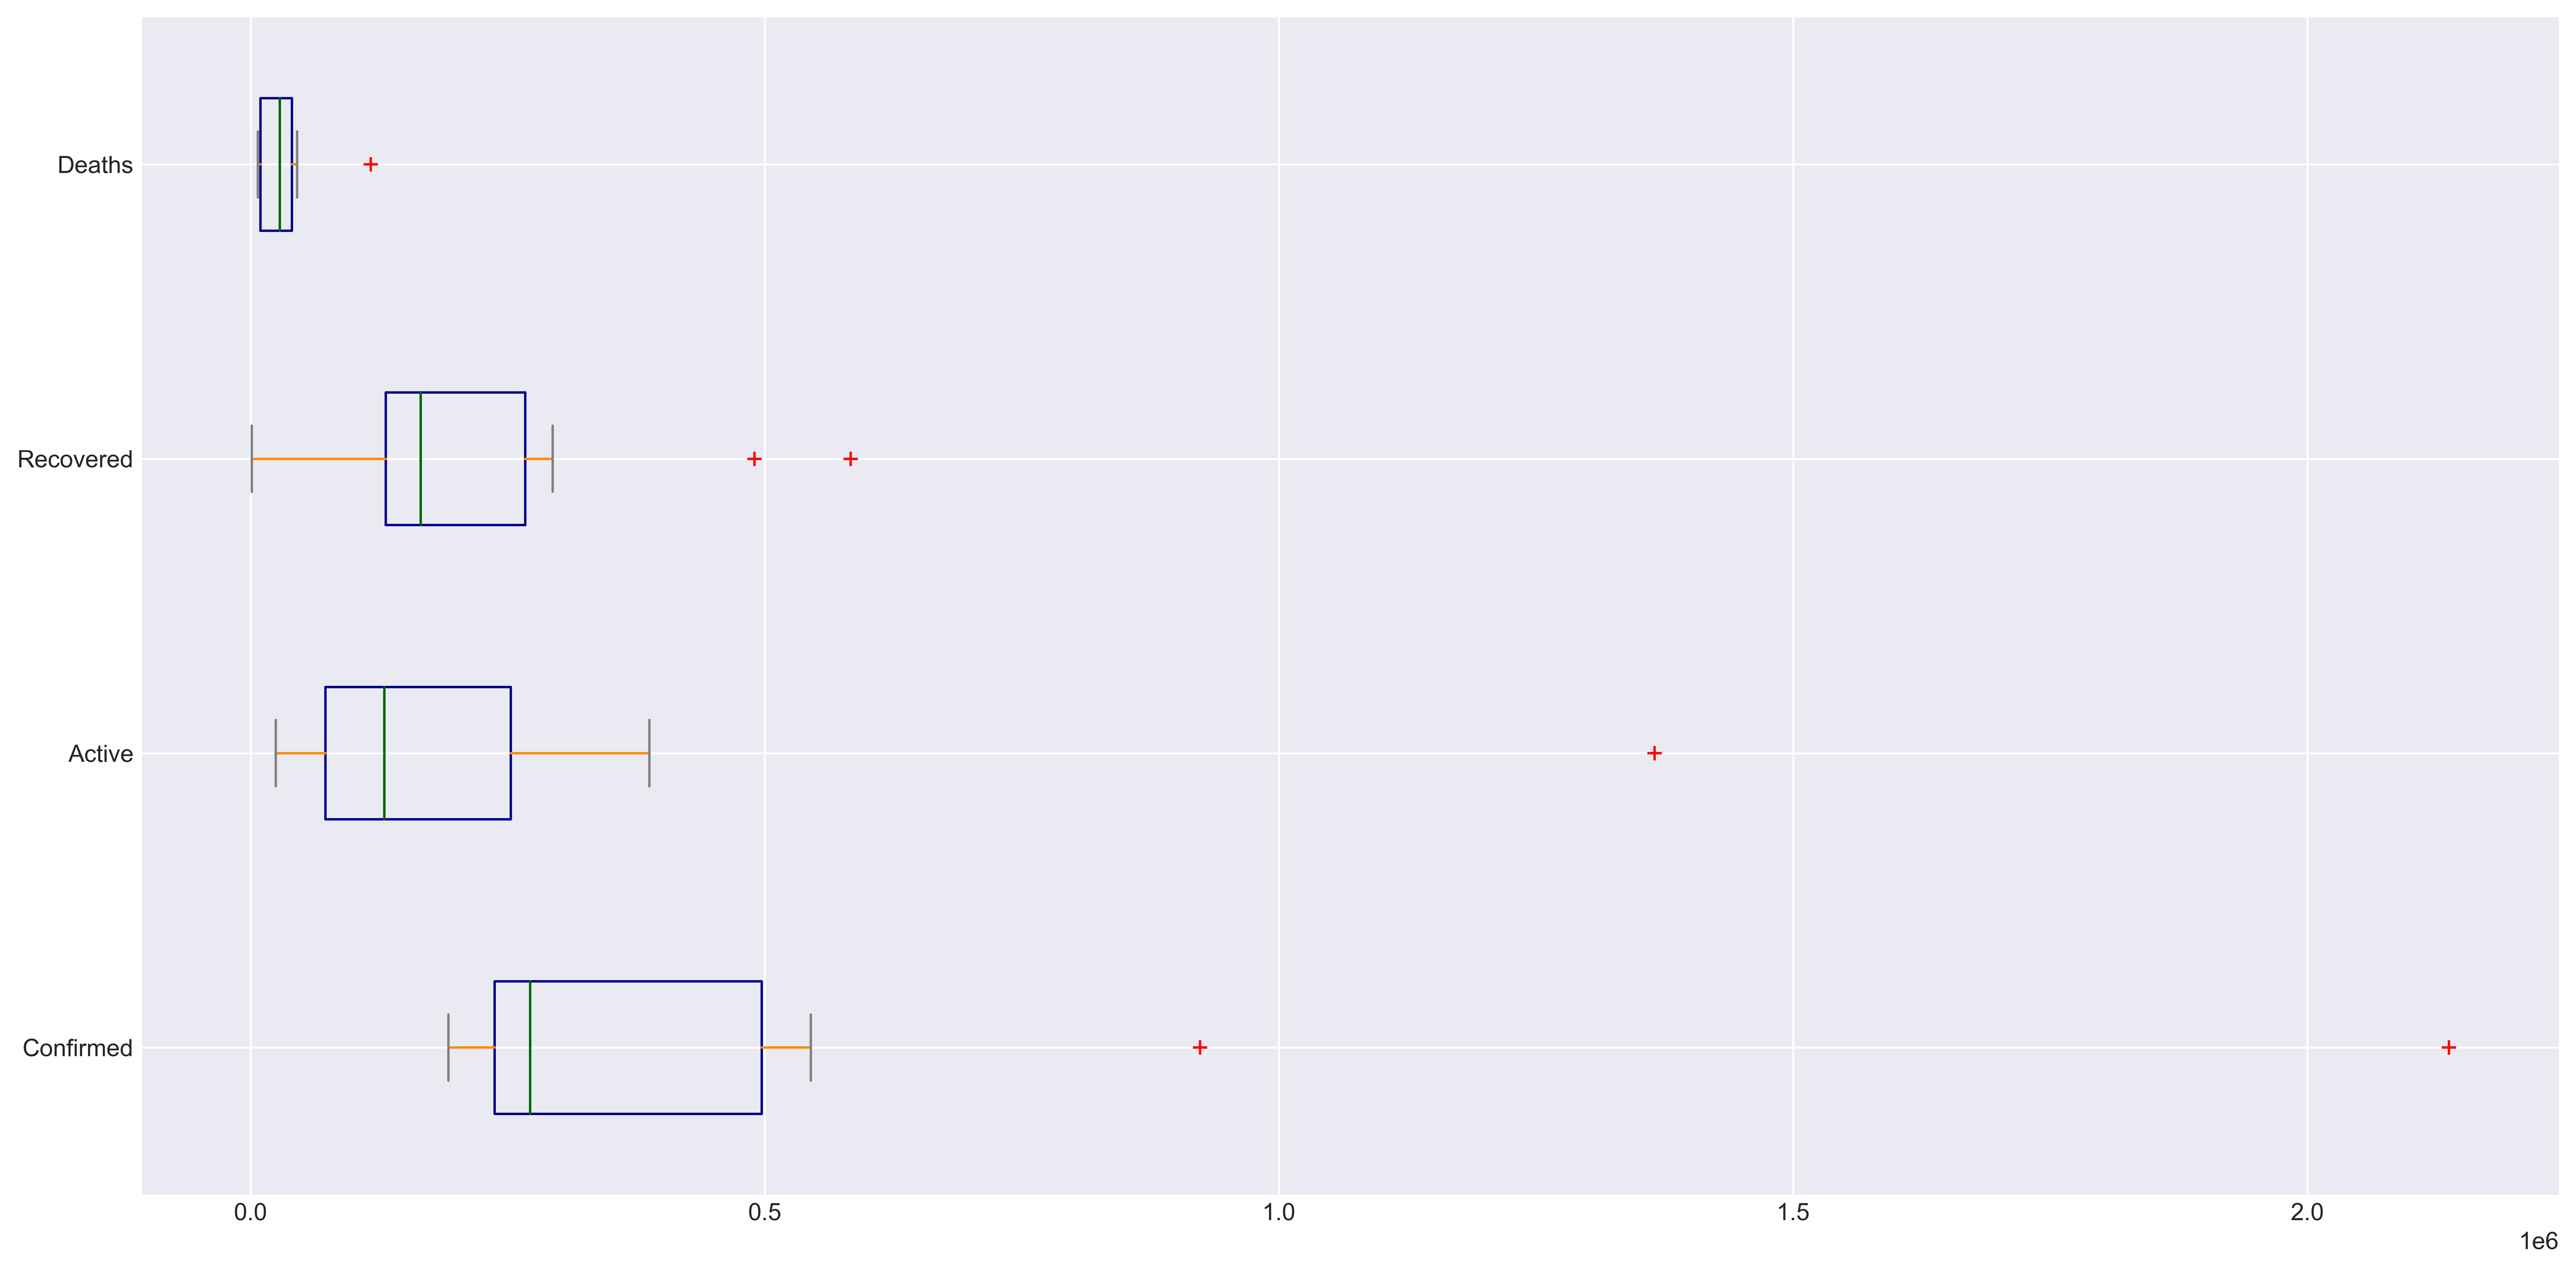

In [58]:
### Show Box plot
color = dict(boxes='DarkBlue', whiskers='DarkOrange',medians='DarkGreen', caps='Gray')
df_countries_top.plot(kind ='box',notch= False,
          color=color, sym='r+', vert=False ,patch_artist=False,
          figsize=(18, 9))
plt.title('')
plt.show()

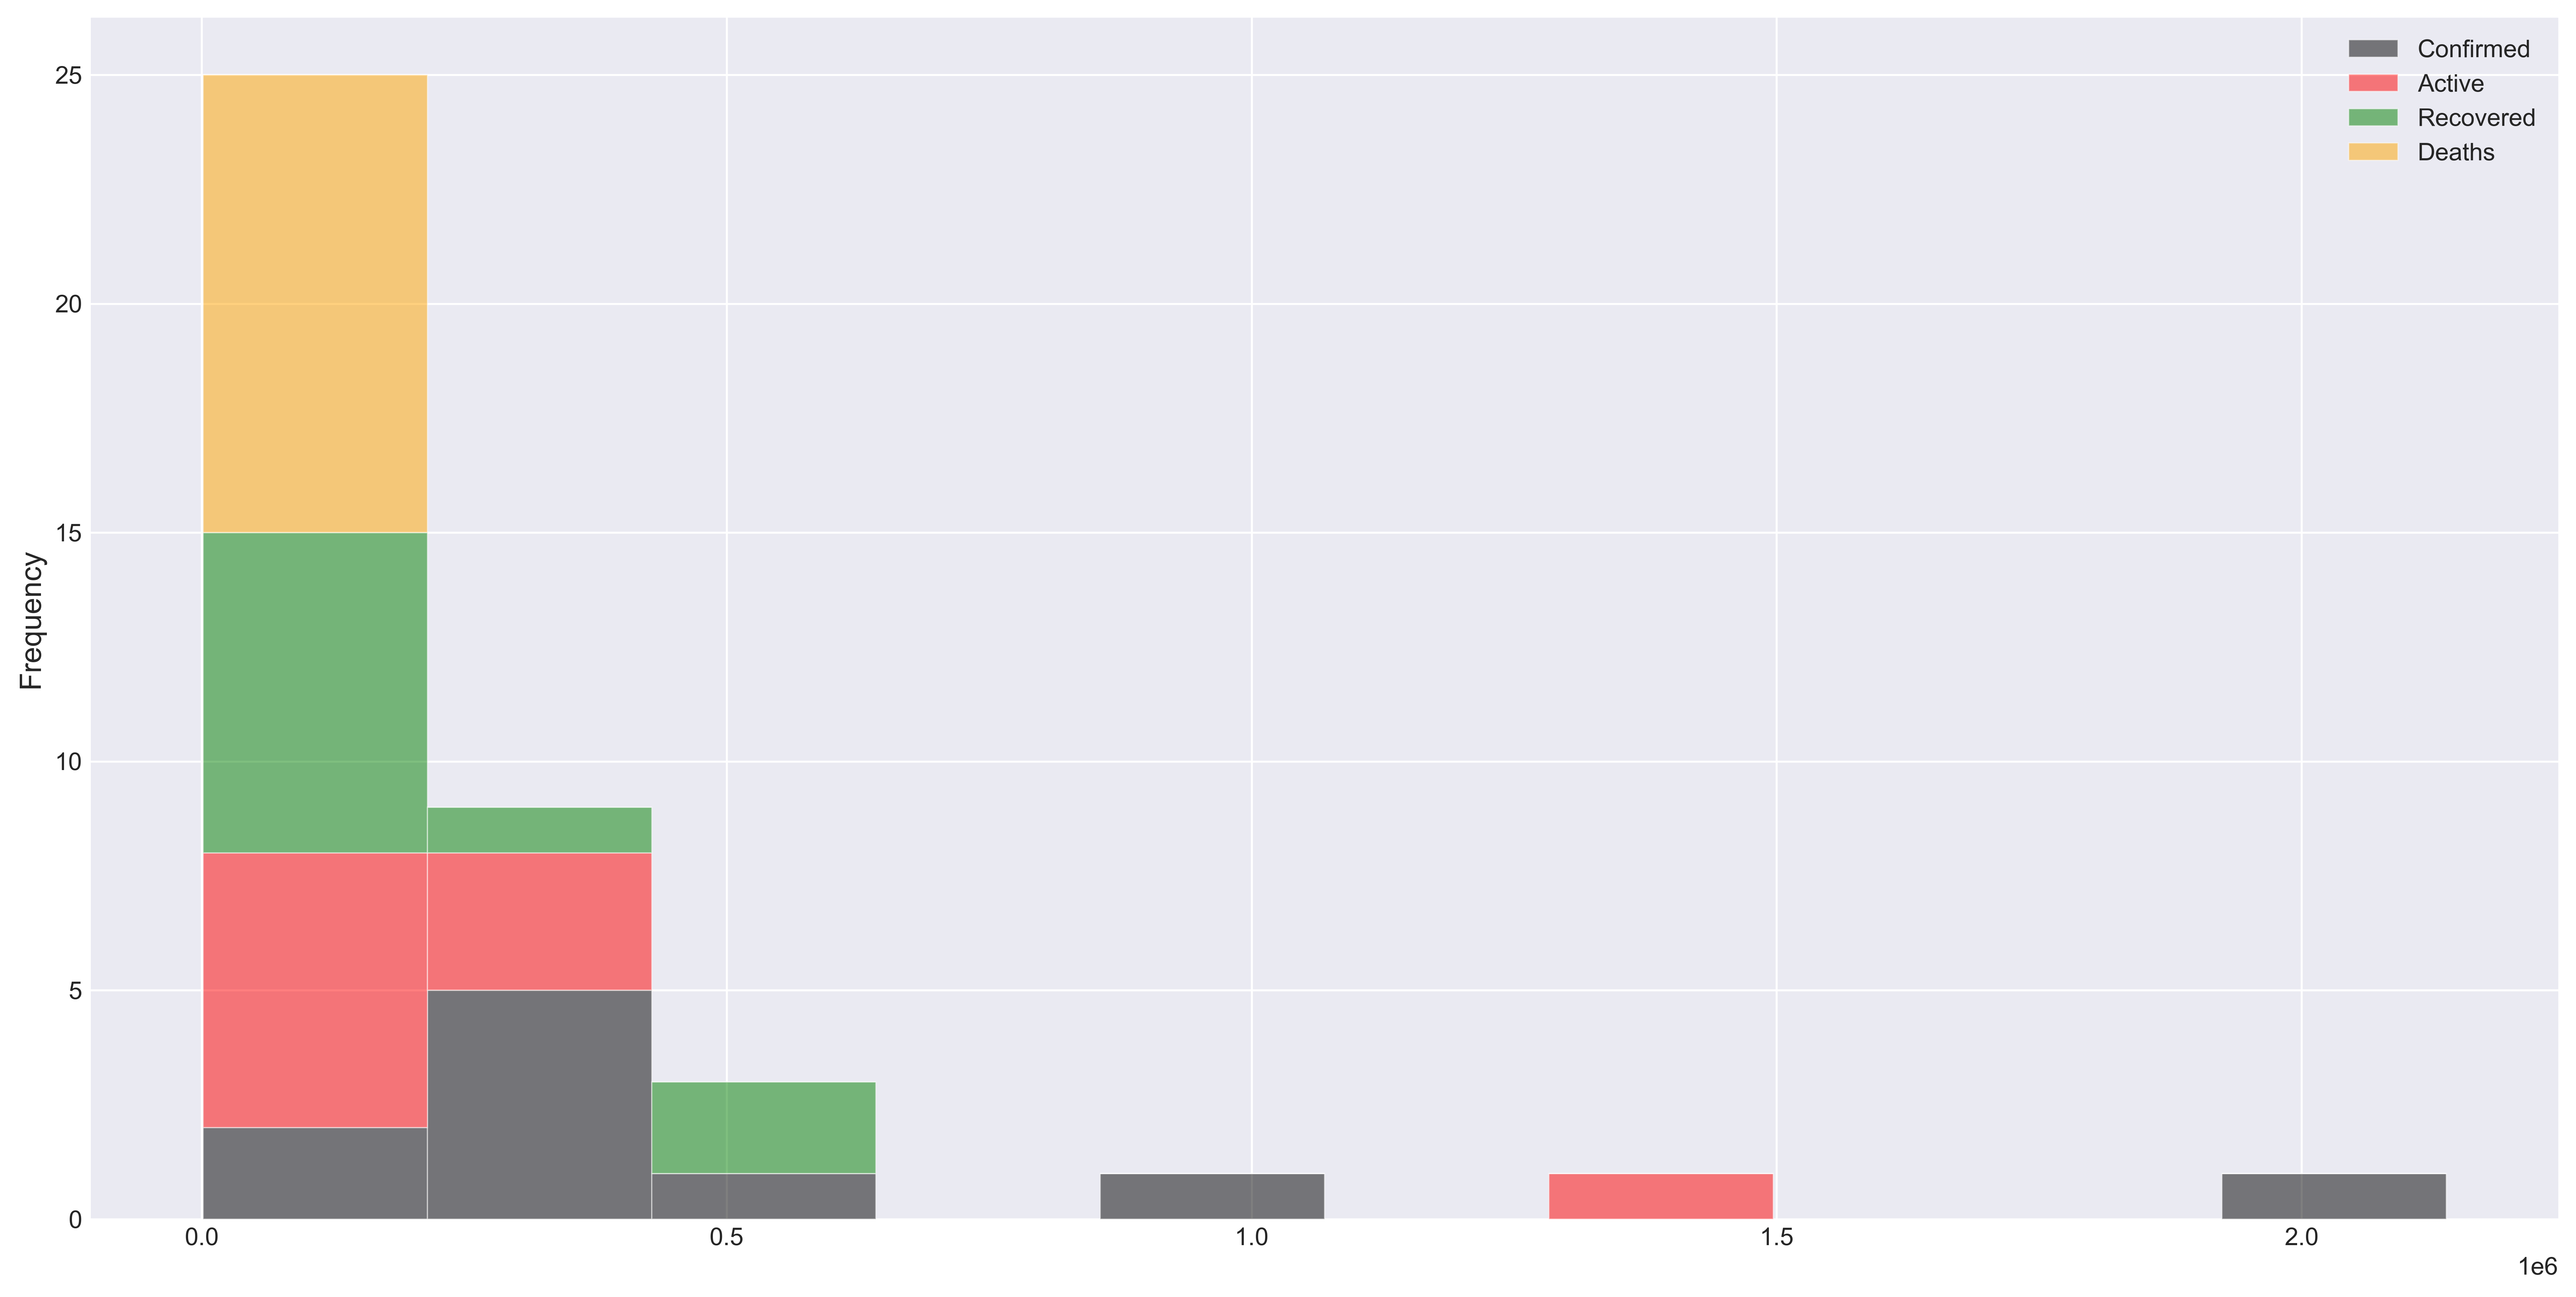

In [59]:
# Histogram plot top countries
df_countries_top.plot(kind='hist', figsize=(18, 9),stacked=True, 
             alpha=0.5,
            color=['black', 'red', 'green', 'orange']) 
plt.show()